In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Check the beacon light dataset

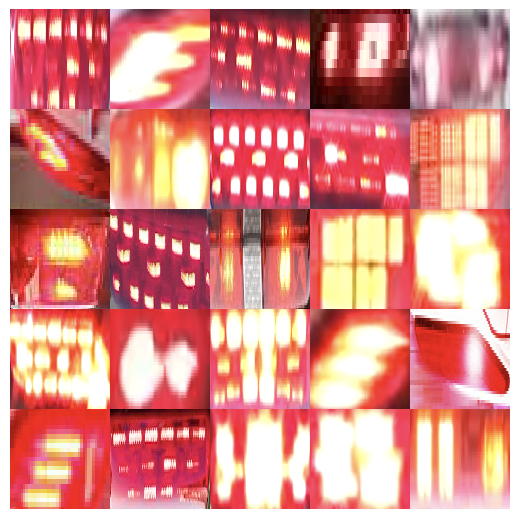

In [33]:
import glob

path="./dataset-sirenlight/positive/*.png"

images=[cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB) for image in glob.glob(path)]
fig=plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], origin='lower', interpolation='None', aspect='auto')
# plt.margins(0,0)
plt.tight_layout()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.show()

In [3]:
img0 = cv2.imread("dataset-sirenlight/positive/sirenlight00000.png")
img1 = cv2.imread("dataset-sirenlight/positive/sirenlight00001.png")

img0_rgb = cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
img0_hsv = cv2.cvtColor(img0,cv2.COLOR_BGR2HSV)

img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1_hsv = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

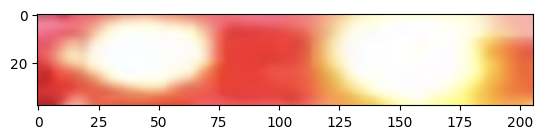

In [4]:
plt.imshow(img0_rgb)

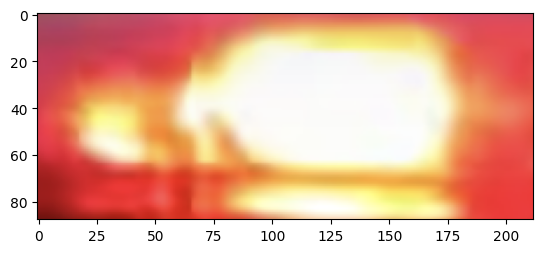

In [5]:
plt.imshow(img1_rgb)

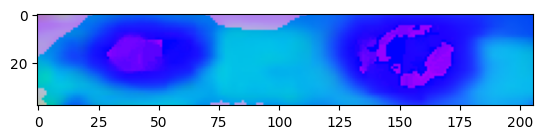

In [6]:
plt.imshow(img0_hsv)

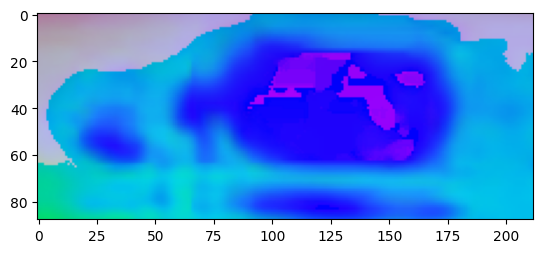

In [7]:
plt.imshow(img1_hsv)

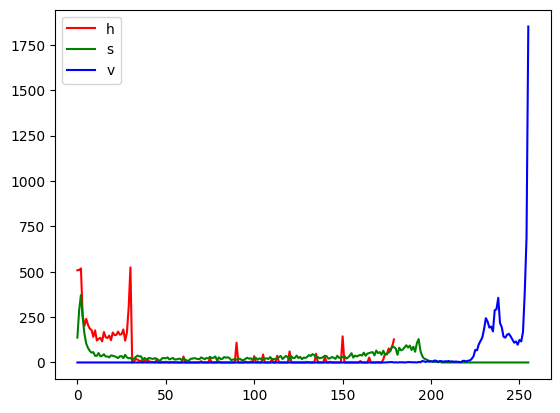

In [8]:
h, s, v = img0_hsv[:,:,0], img0_hsv[:,:,1], img0_hsv[:,:,2]
hist0_h = cv2.calcHist([h],[0],None,[180],[0,180])
hist0_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist0_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist0_h, color='r', label="h")
plt.plot(hist0_s, color='g', label="s")
plt.plot(hist0_v, color='b', label="v")
plt.legend()
plt.show()

In [9]:
len(hist0_v)

256

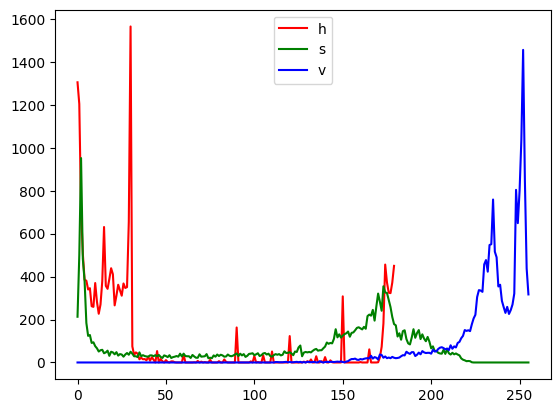

In [10]:
h, s, v = img1_hsv[:,:,0], img1_hsv[:,:,1], img1_hsv[:,:,2]
hist1_h = cv2.calcHist([h],[0],None,[180],[0,180])
hist1_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist1_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist1_h, color='r', label="h")
plt.plot(hist1_s, color='g', label="s")
plt.plot(hist1_v, color='b', label="v")
plt.legend()
plt.show()

In [11]:
len(hist1_v)

256

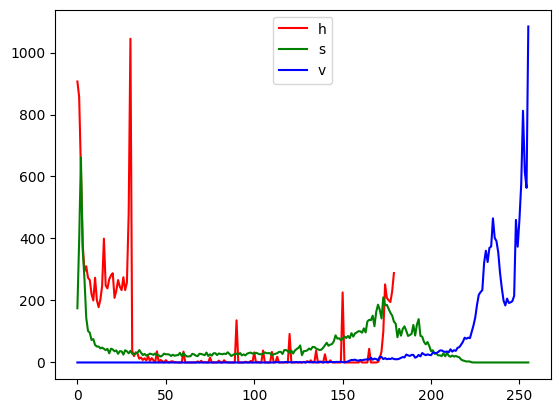

In [12]:
hist_combined_h = (hist0_h + hist1_h)/2
hist_combined_s = (hist0_s + hist1_s)/2
hist_combined_v = (hist0_v + hist1_v)/2
plt.plot(hist_combined_h, color='r', label="h")
plt.plot(hist_combined_s, color='g', label="s")
plt.plot(hist_combined_v, color='b', label="v")
plt.legend()
plt.show()

In [13]:
len(hist_combined_v)

256

In [14]:
hist0 = cv2.calcHist([img0_hsv], [0,1], None, [180,256], [0,180,0, 256])
cv2.normalize(hist0, hist0, 0, 1, cv2.NORM_MINMAX)

hist1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0, 256])
cv2.normalize(hist1, hist1, 0, 1, cv2.NORM_MINMAX)

array([[0.5620053 , 0.1530343 , 0.17414248, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [15]:
ret = cv2.compareHist(hist0, hist1, cv2.HISTCMP_INTERSECT)
ret = ret/np.sum(hist0)
print(ret)

0.4085088923126624


In [16]:
ret = cv2.compareHist(hist0, hist0, cv2.HISTCMP_INTERSECT)
ret = ret/np.sum(hist0)
print(ret)

1.0000000360215318


Text(0.5, 1.0, 'Value (Brightness)')

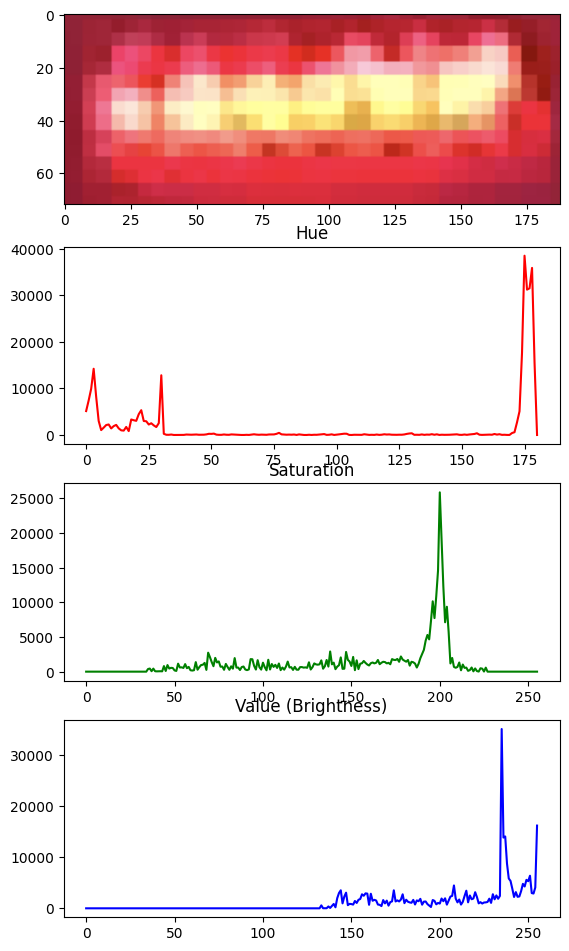

In [24]:
img = cv2.imread("./dataset-sirenlight/test/test-light.png")
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_hsv = cv2.resize(img_hsv, (640,480))
h, s, v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
histh = cv2.calcHist([h],[0],None,[181],[0,181])
hists = cv2.calcHist([s],[0],None,[256],[0,256])
histv = cv2.calcHist([v],[0],None,[256],[0,256])

fig, axs = plt.subplots(4)
fig.subplots_adjust(top=2)
axs[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
axs[1].plot(histh, color='r', label="h")
axs[1].set_title("Hue")
axs[2].plot(hists, color='g', label="s")
axs[2].set_title("Saturation")
axs[3].plot(histv, color='b', label="v")
axs[3].set_title("Value (Brightness)")

# Take the average of 300 sirenlight images

Text(0.5, 1.0, 'Value (Brightness)')

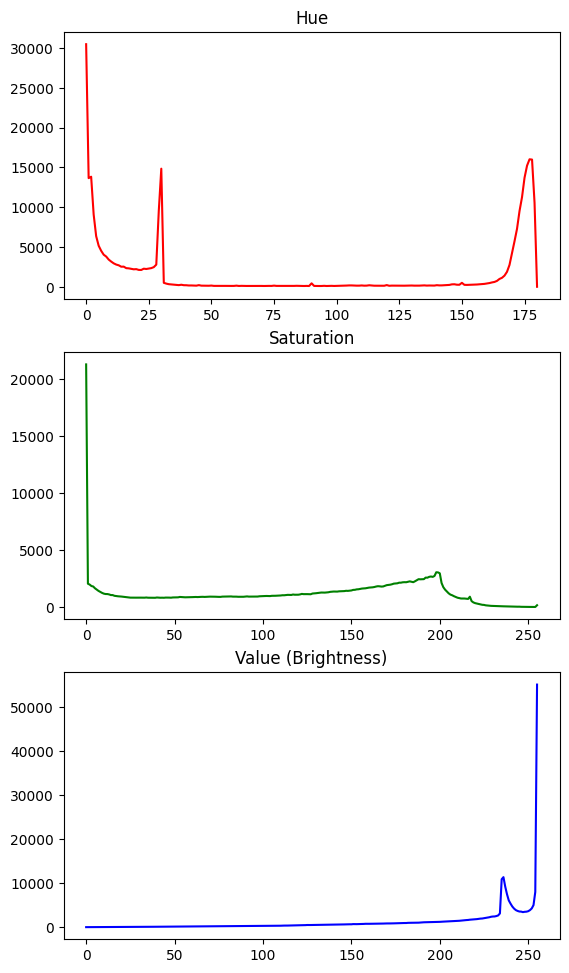

In [18]:
import os
dir = "dataset-sirenlight/positive/"

# hsv_combined = 0
hist_combined_h = 0
hist_combined_s = 0
hist_combined_v = 0

images_list = [os.path.join(dir, filename) for filename in os.listdir(dir) if not filename.startswith('.')]

for img_path in images_list:
    img = cv2.imread(img_path)
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    img_hsv = cv2.resize(img_hsv, (640,480))
    # hsv_combined += img_hsv
    h, s, v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
    hist_combined_h += cv2.calcHist([h],[0],None,[181],[0,181])
    hist_combined_s += cv2.calcHist([s],[0],None,[256],[0,256])
    hist_combined_v += cv2.calcHist([v],[0],None,[256],[0,256])

# hsv_combined /= 300
hist_combined_h /= 300
hist_combined_s /= 300
hist_combined_v /= 300
fig, axs = plt.subplots(3)
fig.subplots_adjust(top=2)
axs[0].plot(hist_combined_h, color='r', label="h")
axs[0].set_title("Hue")
axs[1].plot(hist_combined_s, color='g', label="s")
axs[1].set_title("Saturation")
axs[2].plot(hist_combined_v, color='b', label="v")
axs[2].set_title("Value (Brightness)")

# plt.plot(hist_combined_h, color='r', label="h")
# plt.plot(hist_combined_s, color='g', label="s")
# plt.plot(hist_combined_v, color='b', label="v")
# plt.legend()
# plt.show()

# HSV color extraction

## Set lower and upper bound

Manaully set lower and uppder bounds based on hsv histogram.\
Set the lower bound of saturation greater than 0 to avoid detecting white color from cars and background

In [55]:
''' 
H - 색상
S - 0에 가까울 수록 하얀색, 255에 가까울 수록 H 색상
V - 0에 가까울 수록 검은색, 255에 가까울 수록 H 색상
'''

# 1)
# hsv_lower1 = np.array([0, 0, 230])
# hsv_upper1 = np.array([26, 180, 255])
# hsv_lower2 = np.array([160, 180, 230])
# hsv_upper2 = np.array([180, 220, 255])

# 2)
# hsv_lower1 = np.array([0, 0, 230])
# hsv_upper1 = np.array([26, 255, 255])
# hsv_lower2 = np.array([160, 0, 230])
# hsv_upper2 = np.array([180, 255, 255])

# 3)
# hsv_lower1 = np.array([0, 0, 225])
# hsv_upper1 = np.array([26, 255, 255])
# hsv_lower2 = np.array([160, 0, 225])
# hsv_upper2 = np.array([180, 255, 255])

# 4)
# hsv_lower1 = np.array([0, 0, 225])
# hsv_upper1 = np.array([30, 255, 255])
# hsv_lower2 = np.array([160, 0, 225])
# hsv_upper2 = np.array([180, 255, 255])

# 5)
# hsv_lower1 = np.array([0, 0, 225])
# hsv_upper1 = np.array([40, 255, 255])
# hsv_lower2 = np.array([160, 0, 225])
# hsv_upper2 = np.array([180, 255, 255])

# 6) BEST
hsv_lower1 = np.array([0, 20, 225])
hsv_upper1 = np.array([30, 255, 255])
hsv_lower2 = np.array([160, 20, 225])
hsv_upper2 = np.array([180, 255, 255])

# 7) 
# hsv_lower1 = np.array([0, 30, 200])
# hsv_upper1 = np.array([27, 220, 255])
# hsv_lower2 = np.array([165, 30, 200])
# hsv_upper2 = np.array([180, 220, 255])

In [72]:
def test_hsv_extraction(path):
    img_test = cv2.imread(path)
    img_test = cv2.resize(img_test, (1280,720))
    img_test_rgb = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
    img_test_hsv = cv2.cvtColor(img_test,cv2.COLOR_BGR2HSV)

    hsv_mask1 = cv2.inRange(img_test_hsv, hsv_lower1, hsv_upper1)
    hsv_mask2 = cv2.inRange(img_test_hsv, hsv_lower2, hsv_upper2)
    hsv_mask = hsv_mask1 + hsv_mask2

    total_pixels = img_test_hsv.shape[0]*img_test_hsv.shape[1]
    print(f"Number of pixels: {total_pixels}")
    pixels = cv2.countNonZero(hsv_mask)
    print(f"Number of pixels falls into the range: {pixels}")
    print(f"Percentage: {pixels/total_pixels}")

    result = cv2.bitwise_and(img_test_rgb, img_test_rgb, mask=hsv_mask)

    f, axarr = plt.subplots(3,1)

    axarr[0].imshow(img_test_rgb)
    axarr[1].imshow(hsv_mask,cmap='gray')
    axarr[2].imshow(result)

## Test with positive image

Percentage that color falls in the siren light hsv color range is greater than 0.1 at least

Number of pixels: 921600
Number of pixels falls into the range: 664778
Percentage: 0.7213302951388889


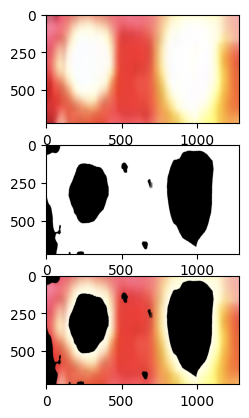

In [57]:
''' 
After calling cv2.inRange, a binary mask is returned,
where white pixels (255) represent pixels that fall into the upper and lower limit range and black pixels (0) do not.
'''
test_hsv_extraction("dataset-sirenlight/positive/sirenlight00000.png")

# TODO: 모든 이미지로 부터 퍼센트를 찾아서 평균을 내줌. 하지만 이 이미지들은 siren light 부분만 crop한거기 때문에 detected emergency vehicle의 윗부분만 잘랐을때는 그 옆 나머지 부분까지 고려해서 퍼센트를 설정해야함.

Number of pixels: 921600
Number of pixels falls into the range: 280295
Percentage: 0.30413953993055554


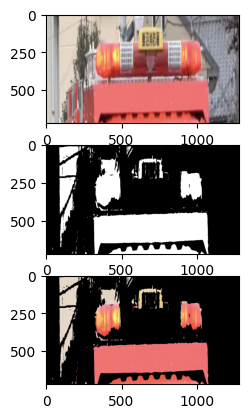

In [58]:
test_hsv_extraction("dataset-sirenlight/test/test-fire.png")

Number of pixels: 921600
Number of pixels falls into the range: 101011
Percentage: 0.10960394965277778


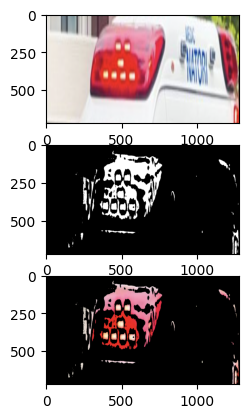

In [59]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul2.png")

Number of pixels: 921600
Number of pixels falls into the range: 167022
Percentage: 0.18123046875


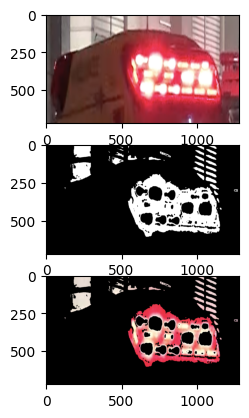

In [60]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul4.png")

Number of pixels: 921600
Number of pixels falls into the range: 197603
Percentage: 0.21441297743055557


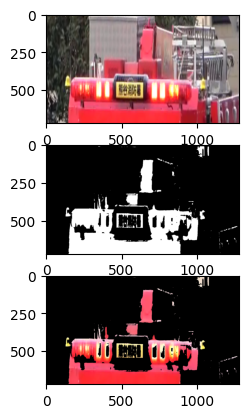

In [61]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul6.png")

Number of pixels: 921600
Number of pixels falls into the range: 145789
Percentage: 0.1581911892361111


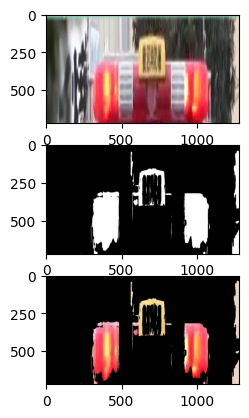

In [62]:
test_hsv_extraction("dataset-sirenlight/test/test-fire2.png")

Number of pixels: 921600
Number of pixels falls into the range: 104089
Percentage: 0.11294379340277778


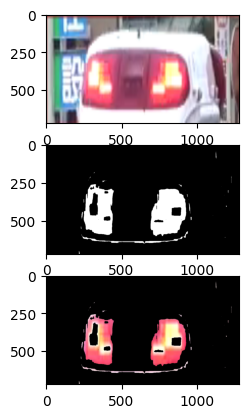

In [63]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul7.png")

Number of pixels: 921600
Number of pixels falls into the range: 67960
Percentage: 0.07374131944444444


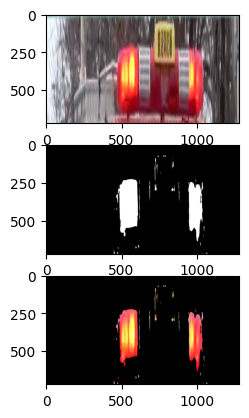

In [64]:
test_hsv_extraction("dataset-sirenlight/test/test-fire3.png")

Number of pixels: 921600
Number of pixels falls into the range: 33101
Percentage: 0.03591688368055555


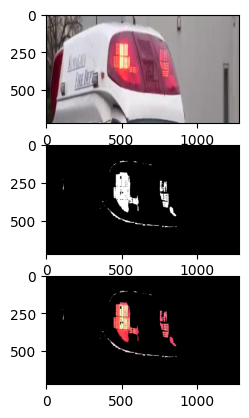

In [65]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul9.png")

Number of pixels: 921600
Number of pixels falls into the range: 11038
Percentage: 0.011976996527777778


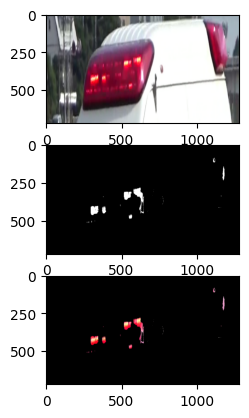

In [66]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul10.png")

Number of pixels: 921600
Number of pixels falls into the range: 15066
Percentage: 0.01634765625


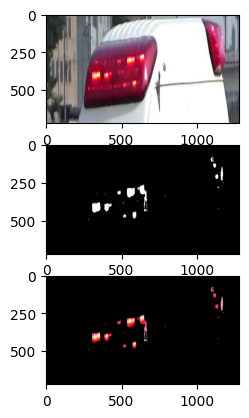

In [73]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul12.png")

## Test with negative image

Percentage that color falls in the siren light hsv color range is lower than 0.1

Number of pixels: 921600
Number of pixels falls into the range: 9608
Percentage: 0.010425347222222223


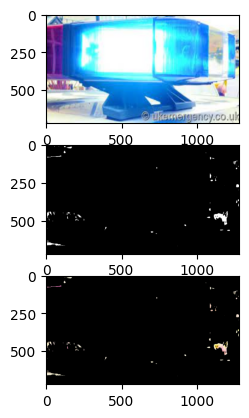

In [67]:
test_hsv_extraction("dataset-sirenlight/negative/test.jpg")

Number of pixels: 921600
Number of pixels falls into the range: 13958
Percentage: 0.015145399305555555


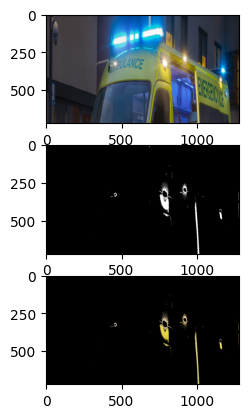

In [49]:
test_hsv_extraction("dataset-sirenlight/negative/test2.png")

Number of pixels: 921600
Number of pixels falls into the range: 53812
Percentage: 0.05838975694444445


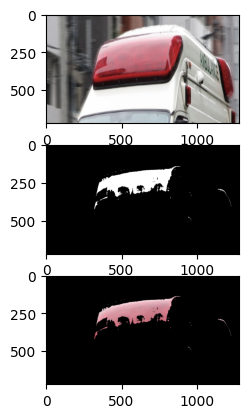

In [50]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul.png")

Number of pixels: 921600
Number of pixels falls into the range: 150689
Percentage: 0.16350802951388888


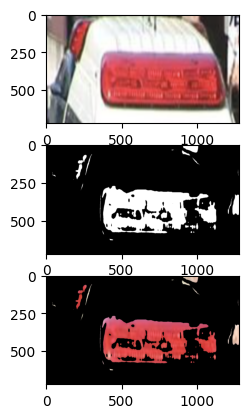

In [51]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul3.png")

Number of pixels: 921600
Number of pixels falls into the range: 2034
Percentage: 0.00220703125


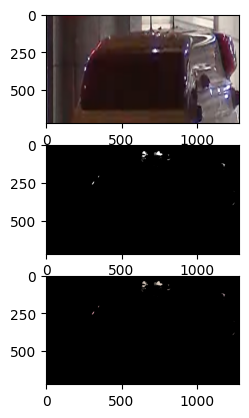

In [52]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul5.png")

Number of pixels: 921600
Number of pixels falls into the range: 52798
Percentage: 0.057289496527777775


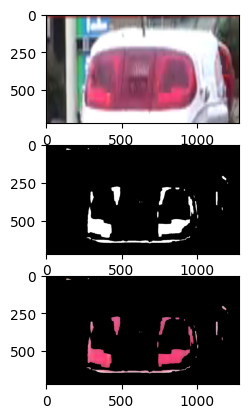

In [53]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul8.png")

Number of pixels: 921600
Number of pixels falls into the range: 5460
Percentage: 0.0059244791666666664


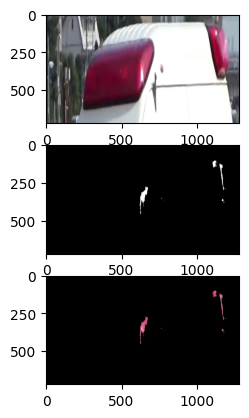

In [54]:
test_hsv_extraction("dataset-sirenlight/test/test-ambul11.png")